# ECE2112: Exploratory Data Analysis on Spotify using Python
---
### Submitted by: John Gabriel Amboy | 2ECE-A
#### Note: For the full-documentation, kindly refer to the `readme.md` file 
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp_data = pd.read_csv('spotify-2023.csv', encoding='windows-1252')
sp_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Overview of the Dataset
---
### Size of the Dataset

In [3]:
sp_row, sp_col = sp_data.shape

print(f"The data set contains {sp_row} rows and {sp_col} columns.")

The data set contains 953 rows and 24 columns.


### Data types of each column
#### As shown below, the data types of each column appear to be either an object or int64.

In [4]:
data_summary = pd.DataFrame({
    'Column Name': sp_data.columns,
    'Data Type': sp_data.dtypes.values
})

print(data_summary)

             Column Name Data Type
0             track_name    object
1         artist(s)_name    object
2           artist_count     int64
3          released_year     int64
4         released_month     int64
5           released_day     int64
6   in_spotify_playlists     int64
7      in_spotify_charts     int64
8                streams    object
9     in_apple_playlists     int64
10       in_apple_charts     int64
11   in_deezer_playlists    object
12      in_deezer_charts     int64
13      in_shazam_charts    object
14                   bpm     int64
15                   key    object
16                  mode    object
17        danceability_%     int64
18             valence_%     int64
19              energy_%     int64
20        acousticness_%     int64
21    instrumentalness_%     int64
22            liveness_%     int64
23         speechiness_%     int64


#### As shown above, the data types of each column appear to be either an object or int64.

### Null Count for Each Column

In [5]:
sp_data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

## Basic Descriptive Statistics
---
### Mean, Median and Mode of `streams` 

#### Since the streams has an object data type, we must convert it into a numerical data type before it can be preocessed.

In [7]:
# Converts the object datatype into float64 datatype for procesing
sp_data['streams'] = pd.to_numeric(sp_data['streams'], errors='coerce')
print(sp_data['streams'].dtype)

float64


In [8]:
# Displays the mode, median and standard deviation with four (4) decimal places.
mean = round(sp_data['streams'].mean(),4)
median = round(sp_data['streams'].median(),4)
std = round(sp_data['streams'].std(),4)

print(f" Mean: {mean} \n Median: {median} \n Standard Deviation: {std}")

 Mean: 514137424.9391 
 Median: 290530915.0 
 Standard Deviation: 566856949.0389


### Distribution of Released Year and Artist Count

In [9]:
# Count the number of tracks for each release year and artist count
rel_year = sp_data['released_year'].value_counts().sort_index()
artist_count = sp_data['artist_count'].value_counts().sort_index()

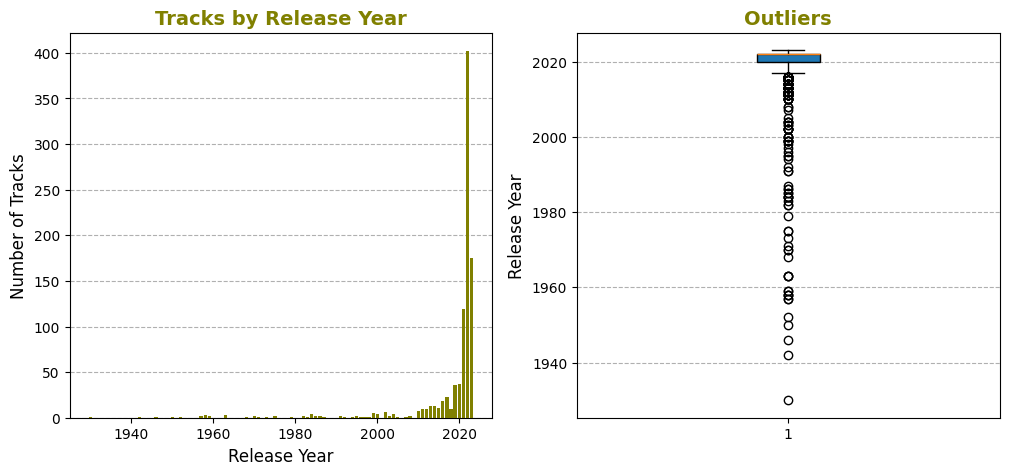

In [56]:
# Plot for the distribution of released year
plt.figure(figsize=(12, 5))

# Plot for tracks by release year
plt.subplot(1, 2, 1)
plt.bar(rel_year.index, rel_year.values, color='olive', zorder=3)
plt.grid(axis='y', linestyle='--', zorder=0)

plt.title('Tracks by Release Year', fontsize=14, fontweight='bold', color='olive')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Plot to show outliers
plt.subplot(1, 2, 2)
plt.boxplot(sp_data['released_year'].dropna(), vert=True, patch_artist=True)
plt.title('Outliers', fontsize=14, fontweight='bold', color='olive')
plt.ylabel('Release Year', fontsize=12)
plt.grid(axis='y', linestyle='--')

plt.show()

#### General Description: The left histogram shows the number of tracks released each year, showing an increase in recent years especially after 2020. This shows that a lot of songs were released during that periond in time. The right box plot shows the distribution of release years, showing the outliers which are tracks released before 2020.

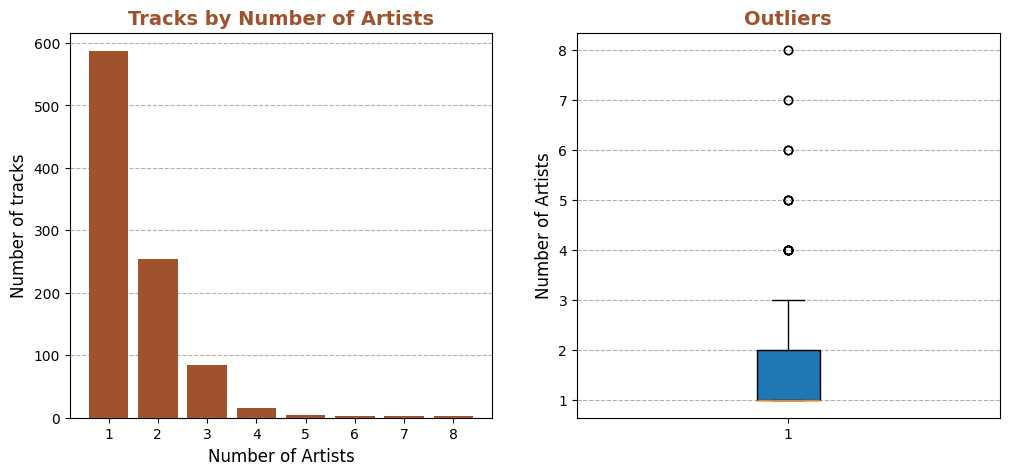

In [51]:
# Plot for the distribution of artist count using bar plot
plt.figure(figsize=(12, 5))

# Plot for tracks by number of artists
plt.subplot(1, 2, 1)
plt.bar(artist_count.index, artist_count.values, color='sienna', zorder=3)
plt.grid(axis='y', linestyle='--', zorder=0)

plt.title('Tracks by Number of Artists', fontsize=14, fontweight='bold', color='sienna')
plt.xlabel('Number of Artists', fontsize=12)
plt.ylabel('Number of tracks', fontsize=12)

# Plot to show outliers using box plot
plt.subplot(1, 2, 2)
plt.boxplot(sp_data['artist_count'].dropna(), vert=True, patch_artist=True)
plt.grid(axis='y', linestyle='--', zorder=0)


plt.title('Outliers', fontsize=14, fontweight='bold', color='sienna')
plt.ylabel('Number of Artists', fontsize=12)

plt.show()

#### General Description: The left histogram shows the distribution of tracks by the number of artists, showing that most tracks are by single artists. The box plot on the right shows the outliers with high numbers of artists, which indicates that it tracks with more than 3 artists are less frequent.

## Top Performers
---
### Top 5 Most Streamed Tracks


In [12]:
# Sorts the streams in ascending value and displays the top 5 tracks
top_stream = sp_data.sort_values('streams', ascending=False).head().reset_index(drop=True)
top_stream

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


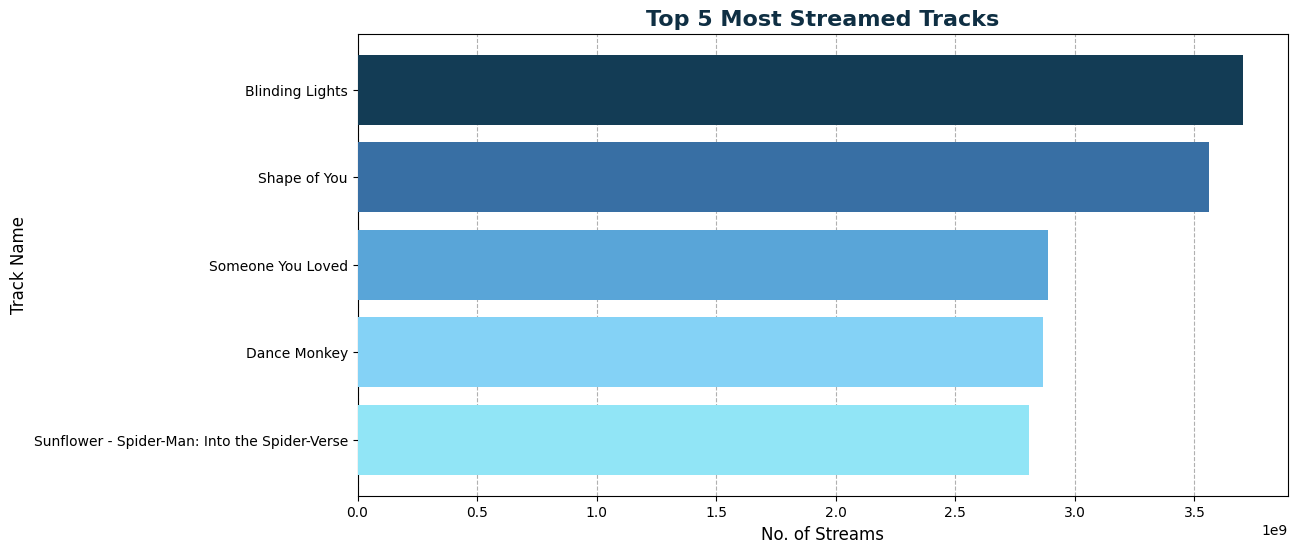

In [54]:
# Plots the top 5 most streamed Tracks
plt.figure(figsize=(12, 6))
plt.barh(top_stream['track_name'], top_stream['streams'], zorder=3, color=['#133C55', '#386FA4', '#59A5D8', '#84D2F6', '#91E5F6'])
plt.grid(axis='x', linestyle='--', zorder=0)

plt.title('Top 5 Most Streamed Tracks', fontsize=16, fontweight='bold', color='#0F2F43')
plt.ylabel('Track Name', fontsize=12)
plt.xlabel('No. of Streams', fontsize=12)
plt.gca().invert_yaxis()

plt.show()

### Top 5 Artists with Most Frequent Artist

In [14]:
# Counts the number of tracks released by each artist and only shows the top 5
most_freq = sp_data['artist(s)_name'].value_counts().head().reset_index()
most_freq

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


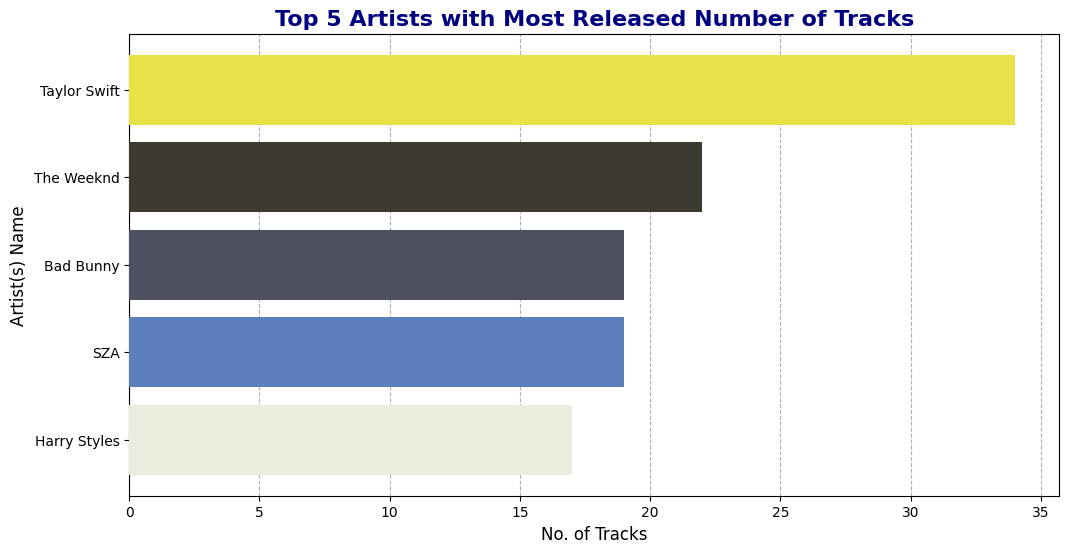

In [57]:
# Plots the top 5 artists with most frequent artist
plt.figure(figsize=(12, 6))
plt.barh(most_freq['artist(s)_name'], most_freq['count'], zorder=3, color=['#E7E247','#3D3B30','#4D5061','#5C80BC','#E9EDDE'])
plt.grid(axis='x', linestyle='--', zorder=0)

plt.title('Top 5 Artists with Most Released Number of Tracks', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('No. of Tracks', fontsize=12)
plt.ylabel('Artist(s) Name', fontsize=12)
plt.gca().invert_yaxis()

plt.show()

## Temporal Trends
---
### Tracks Released Over Time (Annually)

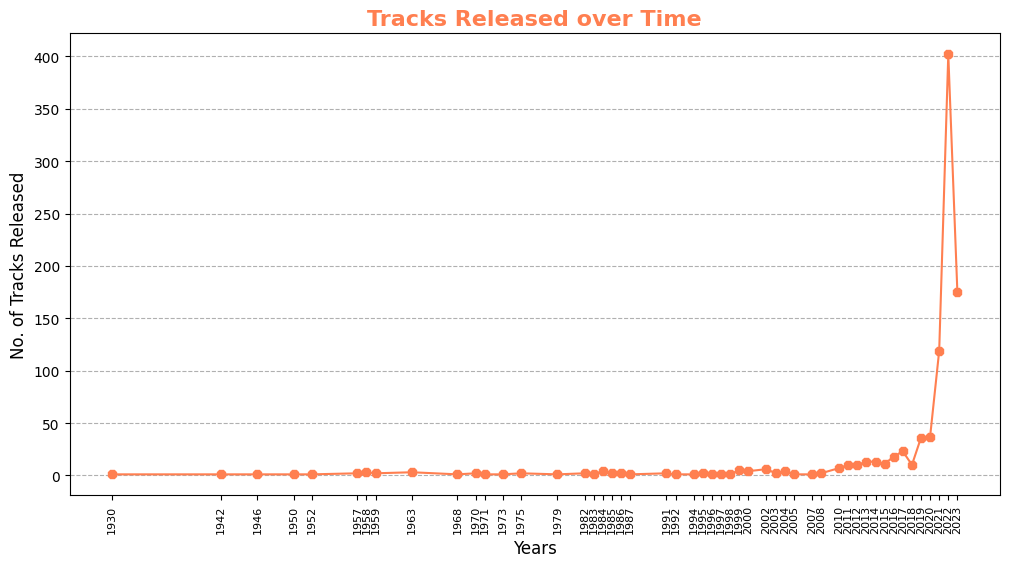

In [58]:
# Plots a linegraph that shows the distribution of tracks over time
plt.figure(figsize=(12, 6))  
plt.plot(rel_year.index, rel_year.values, marker='8', color='coral')
plt.grid(axis='y', linestyle='--')

plt.title('Tracks Released over Time', fontsize=16, fontweight='bold', color='coral')
plt.xlabel('Years', fontsize=12)
plt.ylabel('No. of Tracks Released', fontsize=12)
plt.xticks(rel_year.index, rotation=90, fontsize=8)

plt.show()

### Tracks Released Over Time (Monthly)

In [20]:
# Counts the total number of tracks released each month
monthly_track = sp_data['released_month'].value_counts().sort_index()
monthly_track

released_month
1     134
2      61
3      86
4      66
5     128
6      86
7      62
8      46
9      56
10     73
11     80
12     75
Name: count, dtype: int64

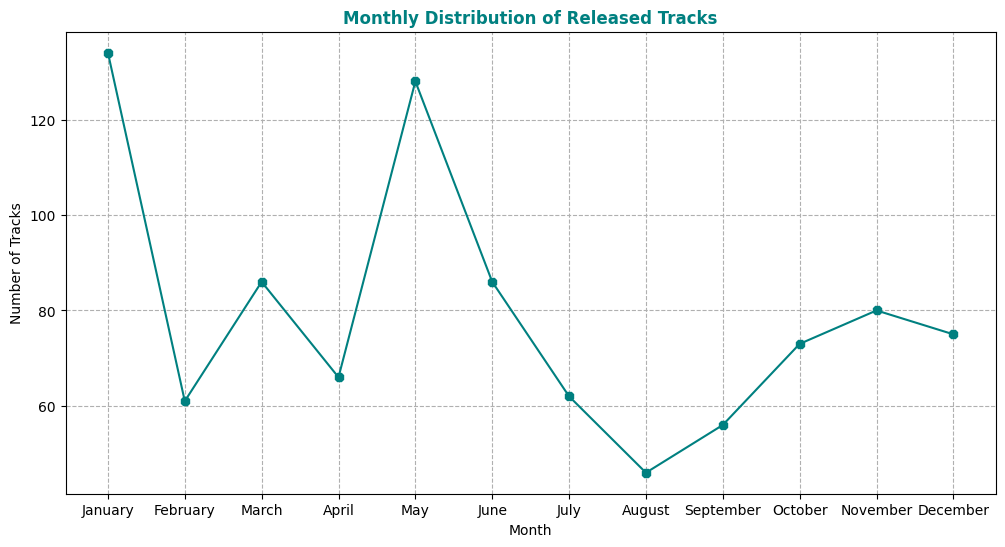

In [21]:
# Plot the Monthly Distribution of Released Tracks using a line graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_track.index, monthly_track.values, zorder=3, color='teal', marker='8')
plt.xticks(ticks=monthly_track.index, labels=['January', 'February', 'March', 'April', 'May', 'June', 
                                    'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(axis='y', linestyle='--', zorder=0)
plt.grid(axis='x', linestyle='--', zorder=0)

plt.ylabel('Number of Tracks')
plt.xlabel('Month')
plt.title('Monthly Distribution of Released Tracks', fontweight='bold', color='teal')

plt.show()

#### **General Description:** Based from the observation of the line graph, it goes to show that most tracks were released around the month of Janurary; while, the month of August, experiences the least amount of tracks released.

## Genre and Music Characteristics
---
### Correlation between Musical Attributes

In [22]:
# Calculates the correlation of the musical attributes with the stream
corr = sp_data[['streams', 'bpm', 'danceability_%', 
                'valence_%',	'energy_%',	'acousticness_%', 
                'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()

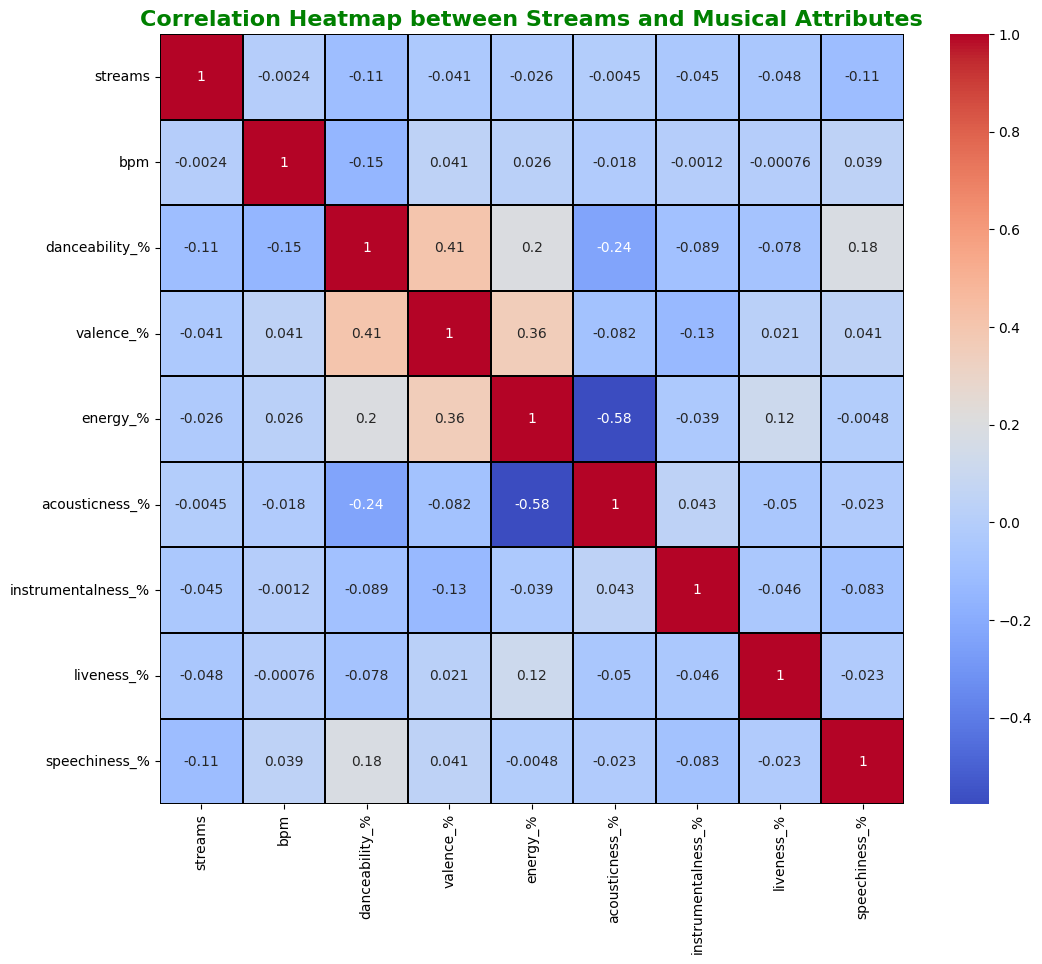

In [23]:
# Plots a heat map between the correlation of streams and musical attributes

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, linecolor='black',linewidths=0.3)
plt.title("Correlation Heatmap between Streams and Musical Attributes", fontweight='bold', color='green', fontsize=16)
plt.show()

#### **General Description:** The heatmap shows the correlation between the streams and the musical attributes in addition to the correlation between the musical attributes itself. From observation, there doesn't seem to be an attribute that influence the number of streams the most since the correlation between the streams and musical attribute display a negative value. Therefore, it can be said that due to the different tastes of people, the number of streams is not influenced by its musical attribute.


#### For the correlation between `danceablity_%` and `energy_%`, the heatmap shows a moderate correlation due to the positive value it exhibits. Additionally, a low correlation seems to be exhibited between `valence_%` and `acousticness_%` due to its negative value.

## Platform Popularity
---
### Platform popularity Distribution

In [59]:
# Converts the data type of in_deezer_playlist from object to float/numeric
sp_data['in_deezer_playlists'] = pd.to_numeric(sp_data['in_deezer_playlists'], errors='coerce')
print(sp_data['in_deezer_playlists'].dtype)

float64


In [25]:
# Calculating the track counts in different platforms
spotify_playlist = sp_data['in_spotify_playlists'].sum()
deezer_playlist = sp_data['in_deezer_playlists'].sum()
apple_playlist = sp_data['in_apple_playlists'].sum()

print(f"\n Track count in Spotify Playlists: {spotify_playlist} \n Track count in Deezer Playlists: {deezer_playlist} \n Track count in Apple Playlists: {apple_playlist}")


 Track count in Spotify Playlists: 4955719 
 Track count in Deezer Playlists: 95913.0 
 Track count in Apple Playlists: 64625


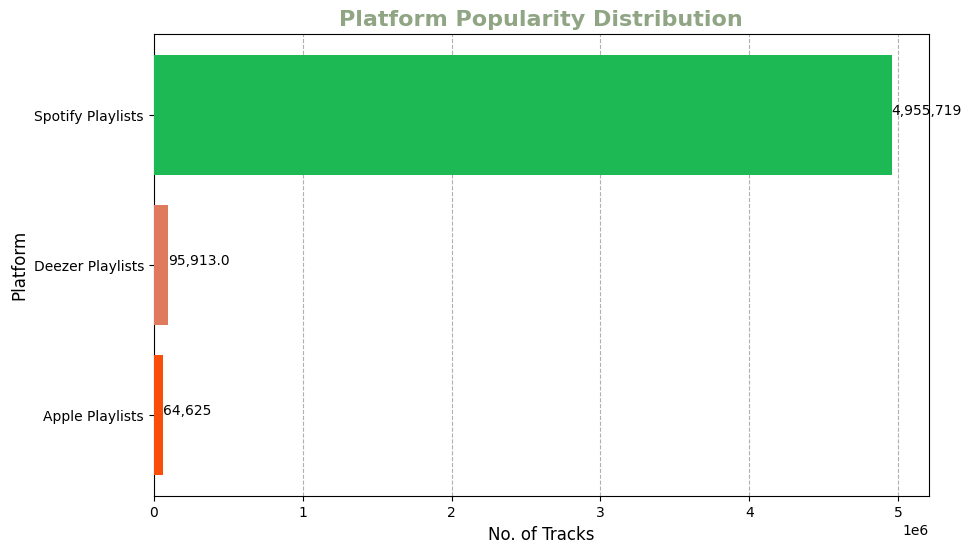

In [69]:
# Putting counts into a list for easy plotting
platforms = ['Spotify Playlists', 'Deezer Playlists', 'Apple Playlists']
no_tracks = [spotify_playlist, deezer_playlist, apple_playlist]

# Plots a bar graph for the Platform popularity Distribution
plt.figure(figsize=(10, 6))
plt.barh(platforms, no_playlist, color=['#1DB954', '#E07A5F', '#FA4D09'], zorder=3)
plt.grid(axis='x', linestyle='--', zorder=0)

plt.title('Platform Popularity Distribution', fontweight='bold', color='#90A583', fontsize=16)
plt.xlabel('No. of Tracks', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.gca().invert_yaxis()  

# Show values on bars for clarity
for index, value in enumerate(counts):
    plt.text(value, index, f'{value:,}')  

plt.show()

### General Description: Based on the observation of the bar plot for `Platform Popularity Distribution`, there was a stark difference between the 3 platforms included in the dataset. Furthermore, it indicates that Spotify, as a platform, dominates in terms of the volume of tracks featured.

## Advanced Analysis
---
### Distribution of Keys by Streams

In [82]:
# Calculates the number of streams per musical key
streams_by_key = sp_data.groupby('key')['streams'].sum().sort_values(ascending=False)
streams_by_key

key
C#    7.251363e+10
G     4.344954e+10
G#    4.339898e+10
D     4.289157e+10
B     4.206718e+10
F     4.169173e+10
F#    3.813251e+10
E     3.580483e+10
A#    3.149110e+10
A     3.025426e+10
D#    1.825021e+10
Name: streams, dtype: float64

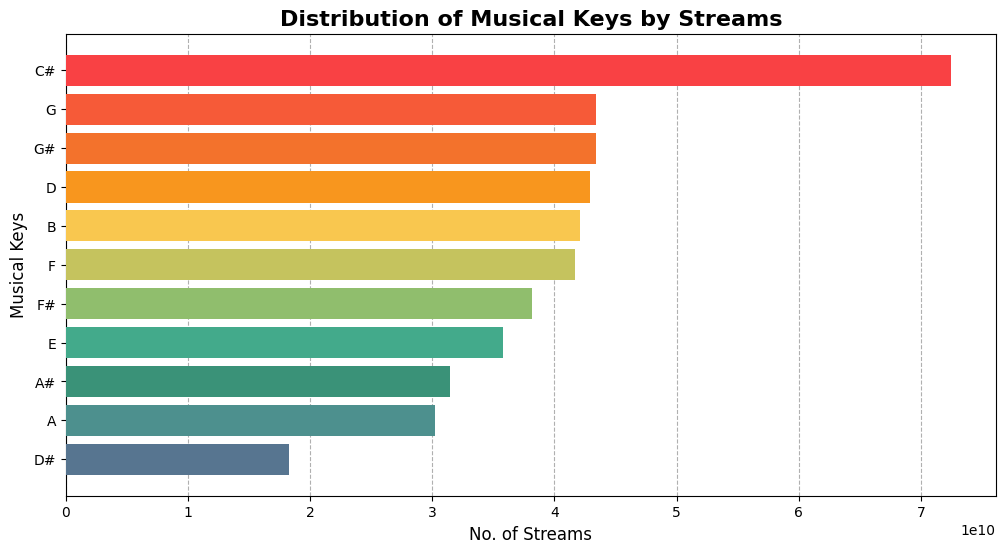

In [87]:
# Plots the Distribution of Musical Keys by streams using a bar graph
plt.figure(figsize=(12, 6))
plt.barh(streams_by_key.index, streams_by_key.values, color=['#F94144','#F65A38','#F3722C','#F8961E','#F9C74F','#C5C35E','#90BE6D','#43AA8B','#3A9278','#4D908E','#577590'], zorder=3)
plt.grid(axis='x', linestyle='--', zorder=0)

plt.title('Distribution of Musical Keys by Streams', fontweight='bold', color='black', fontsize=16)
plt.xlabel('No. of Streams', fontsize=12)
plt.ylabel('Musical Keys', fontsize=12)
plt.gca().invert_yaxis()  

plt.show()

#### General Description: Based from the observation of the bar graph for the `Distribution of of Musical Keys by Streams`, it was observed that there is a preference for tracks with Major modes over Minor modes. Additionally, it appears that there are more tracks using the C# key which has the highest track count among the musical keys.  

### Distribution of Mode by Streams

In [83]:
# Calculates the number of streams per musical key
streams_by_mode = sp_data.groupby('mode')['streams'].sum().sort_values(ascending=False)
streams_by_mode

mode
Major    2.936232e+11
Minor    1.958356e+11
Name: streams, dtype: float64

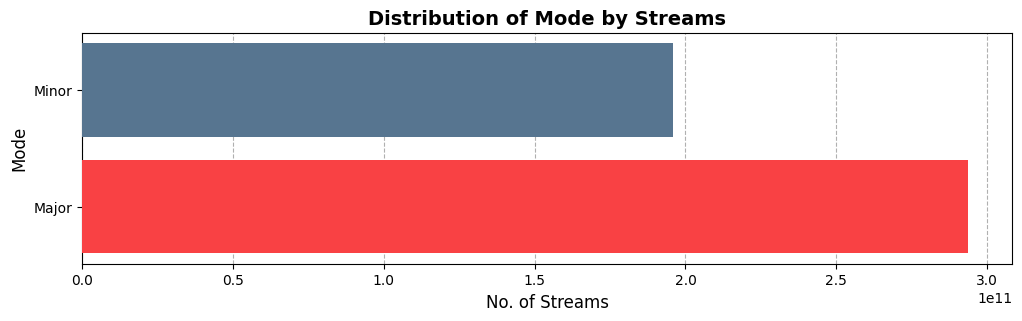

In [93]:
# Plots the Distribution of Mode by streams using a bar graph
plt.figure(figsize=(12, 3))
plt.barh(streams_by_mode.index, streams_by_mode.values, color=['#F94144','#577590'], zorder=3)
plt.grid(axis='x', linestyle='--', zorder=0)

plt.title('Distribution of Mode by Streams', fontweight='bold', color='black', fontsize=14)
plt.xlabel('No. of Streams', fontsize=12)
plt.ylabel('Mode', fontsize=12)

plt.show()

#### General Description: Based from the observation of the bar graph for the `Distribution of Mode by Streams`, it was observed that tracks with a mode of major was preferred over tracks with a mode of minor. 

### Top 10 Most Frequently Appearing Artist in Playlists

In [41]:
# Create a separate DataFrame for calculating the total playlist count
playlist = sp_data[['artist(s)_name', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].copy()

# Calculate the total playlist count in the Playlist
playlist['total_playlist'] = (
    playlist['in_spotify_playlists'] + 
    playlist['in_deezer_playlists'] + 
    playlist['in_apple_playlists']
)

artist_popularity = playlist.groupby('artist(s)_name')['total_playlist'].sum().sort_values(ascending=False).head(10)
artist_popularity

artist(s)_name
Taylor Swift      114815.0
Harry Styles       91898.0
The Weeknd         77431.0
Bad Bunny          52657.0
Frank Ocean        52162.0
Olivia Rodrigo     49359.0
SZA                45786.0
Doja Cat           36405.0
Ed Sheeran         30690.0
Arctic Monkeys     28068.0
Name: total_playlist, dtype: float64

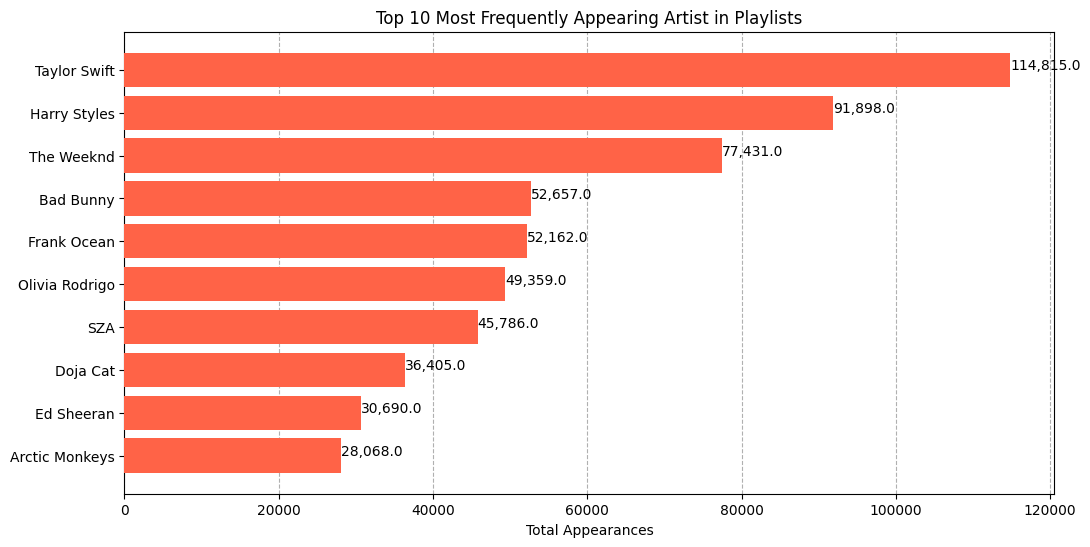

In [94]:
plt.figure(figsize=(12, 6))
plt.barh(artist_popularity.index, artist_popularity.values, color='#FF6347', zorder=3)
plt.grid(axis='x', linestyle='--', zorder=0)

plt.title('Top 10 Most Frequently Appearing Artist in Playlists')
plt.xlabel('Total Appearances')
plt.gca().invert_yaxis()  # Flip to have the highest at the top

for index, value in enumerate(artist_popularity.values):
    plt.text(value, index, f'{value:,}', color='black')
plt.show()

### Top 10 Most Frequently Appearing Artist in Charts

In [39]:
# Converts the data type from object to float/numeric
sp_data['in_shazam_charts'] = pd.to_numeric(sp_data['in_shazam_charts'], errors='coerce')

In [42]:
# Create a separate DataFrame for calculating the total chart counts
charts = sp_data[['artist(s)_name', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].copy()

# Calculate the total charts in the new DataFrame
charts['total_charts'] = (
    charts['in_spotify_charts'] + 
    charts['in_apple_charts'] + 
    charts['in_shazam_charts'] + 
    charts['in_deezer_charts']
)

# Summing total chart appearances for each artist and getting the top 10
charts_popularity = charts.groupby('artist(s)_name')['total_charts'].sum().sort_values(ascending=False).head(10)
charts_popularity


artist(s)_name
Taylor Swift         4277.0
The Weeknd           1952.0
Bad Bunny            1779.0
SZA                  1653.0
Olivia Rodrigo       1495.0
NewJeans             1341.0
Dave, Central Cee    1267.0
Ed Sheeran           1260.0
Gunna                1257.0
Latto, Jung Kook     1246.0
Name: total_charts, dtype: float64

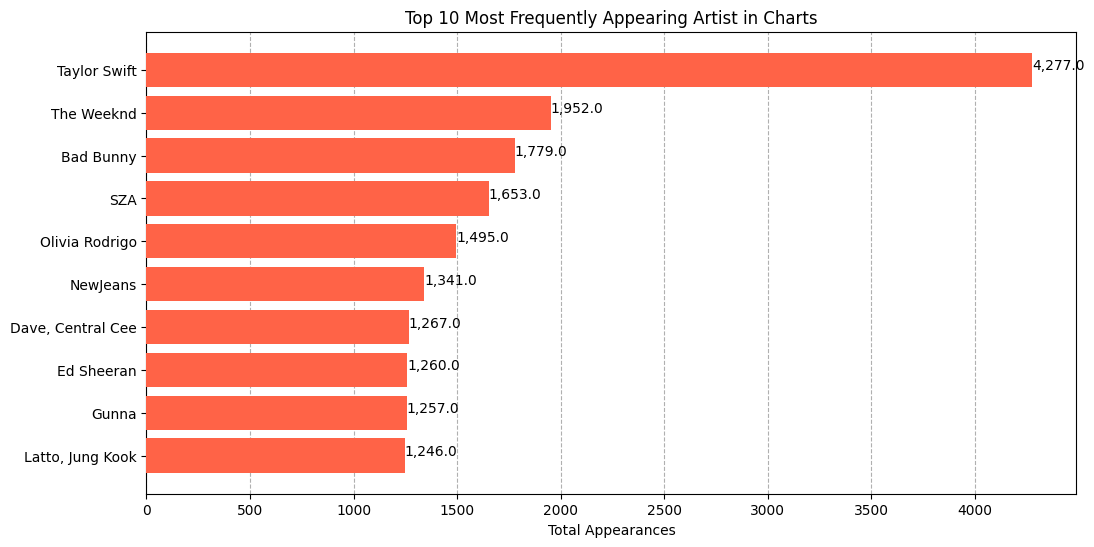

In [95]:
plt.figure(figsize=(12, 6))
plt.barh(charts_popularity.index, charts_popularity.values, color='#FF6347', zorder=3)
plt.grid(axis='x', linestyle='--', zorder=0)

plt.title('Top 10 Most Frequently Appearing Artist in Charts')
plt.xlabel('Total Appearances')
plt.gca().invert_yaxis()  # Flip to have the highest at the top

for index, value in enumerate(charts_popularity.values):
    plt.text(value, index, f'{value:,}', color='black')
plt.show()